# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('c:/Users/ludkov-as/repo/linal/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

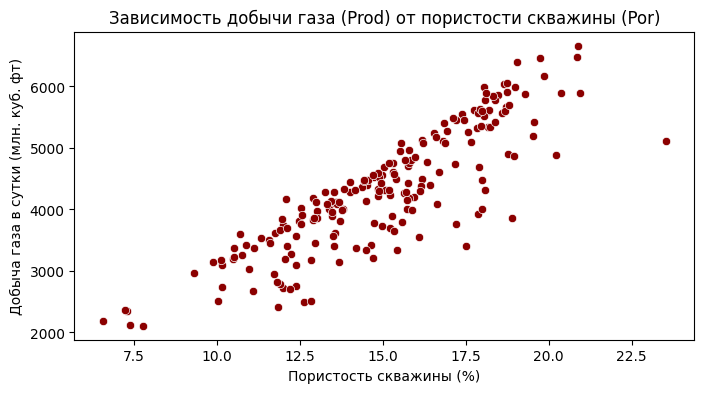

In [3]:
# В качестве разведывательного анализа исследуем взаимосвязи целевого признака (добычи газа в сутки (Prod)) с остальными признаками
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от пористости скважины (Por)")
plot = sns.scatterplot(data, x='Por', y='Prod', color='darkred')
plot.set_xlabel('Пористость скважины (%)')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

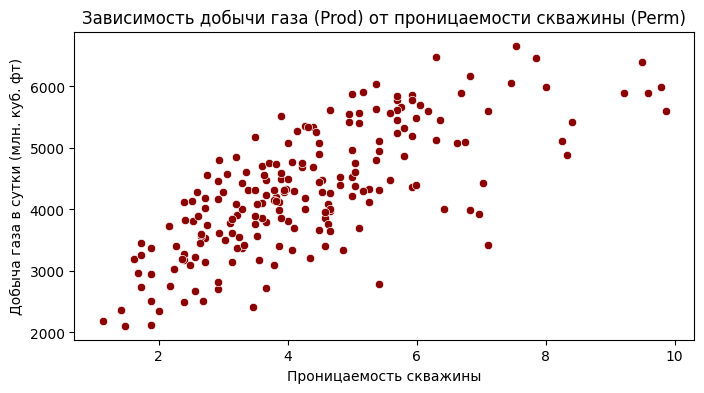

In [4]:
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от проницаемости скважины (Perm)")
plot = sns.scatterplot(data, x='Perm', y='Prod', color='darkred')
plot.set_xlabel('Проницаемость скважины')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

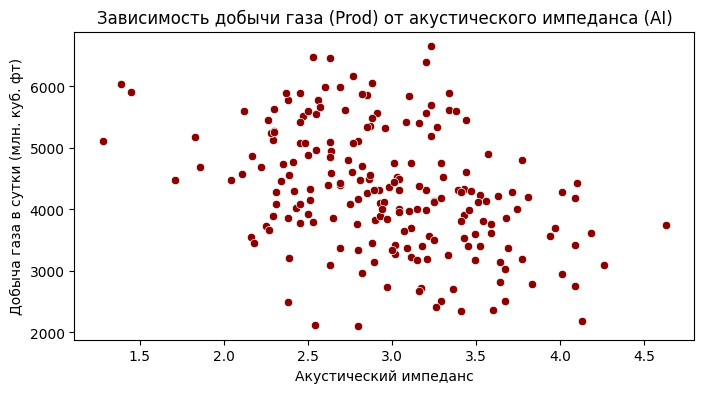

In [5]:
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от акустического импеданса (AI)")
plot = sns.scatterplot(data, x='AI', y='Prod', color='darkred')
plot.set_xlabel('Акустический импеданс')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

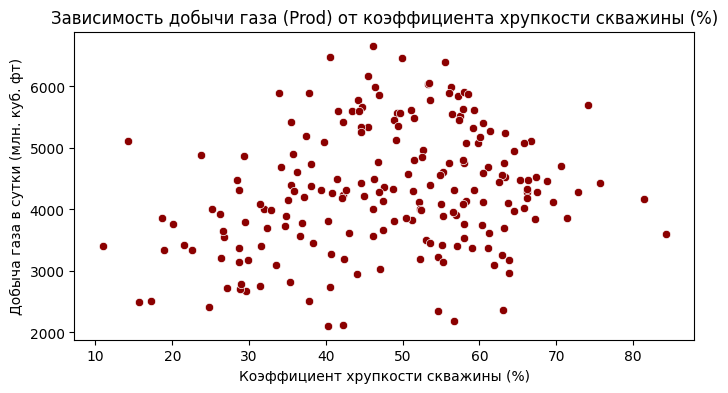

In [6]:
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от коэффициента хрупкости скважины (%)")
plot = sns.scatterplot(data, x='Brittle', y='Prod', color='darkred')
plot.set_xlabel('Коэффициент хрупкости скважины (%)')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

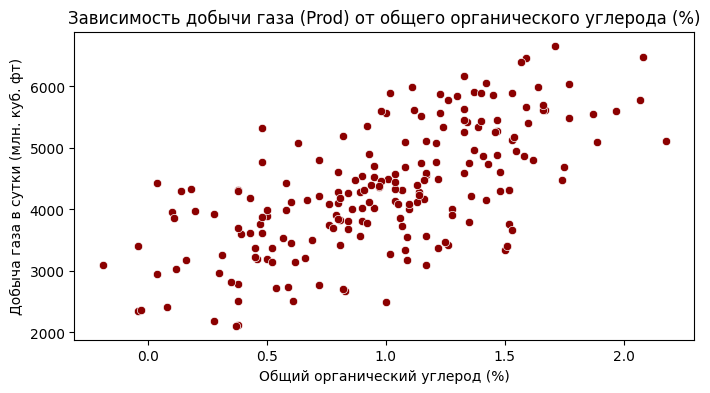

In [7]:
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от общего органического углерода (%)")
plot = sns.scatterplot(data, x='TOC', y='Prod', color='darkred')
plot.set_xlabel('Общий органический углерод (%)')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

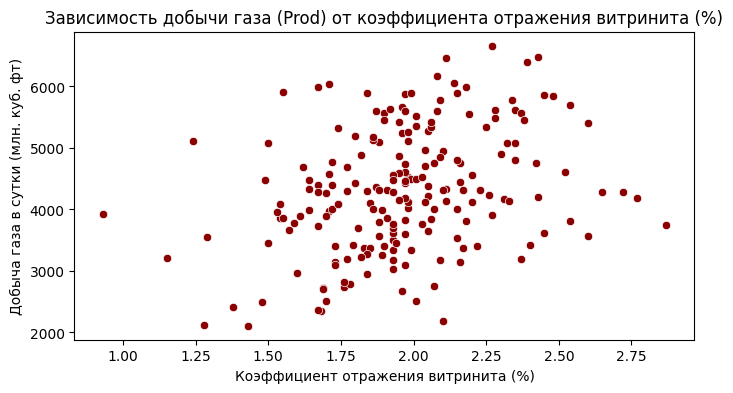

In [8]:
plt.figure(figsize=(8, 4))
plt.title("Зависимость добычи газа (Prod) от коэффициента отражения витринита (%)")
plot = sns.scatterplot(data, x='VR', y='Prod', color='darkred')
plot.set_xlabel('Коэффициент отражения витринита (%)')
plot.set_ylabel('Добыча газа в сутки (млн. куб. фт)')
plt.show()

<div class="alert alert-block">
<b>По результатам проведенного анализа можем однозначно определить наличие прямой зависимости добычи от следующих признаков:</b>

- Пористость скважины (**Por**) *(наиболее выраженная зависимость)*;
- Проницаемость скважины (**Perm**);
- Общий органический углерод (**TOC**).
</div>

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Детерминант корреляционной матрицы: 0.0007299388072652095;
Ранг корреляционной матрицы: 8


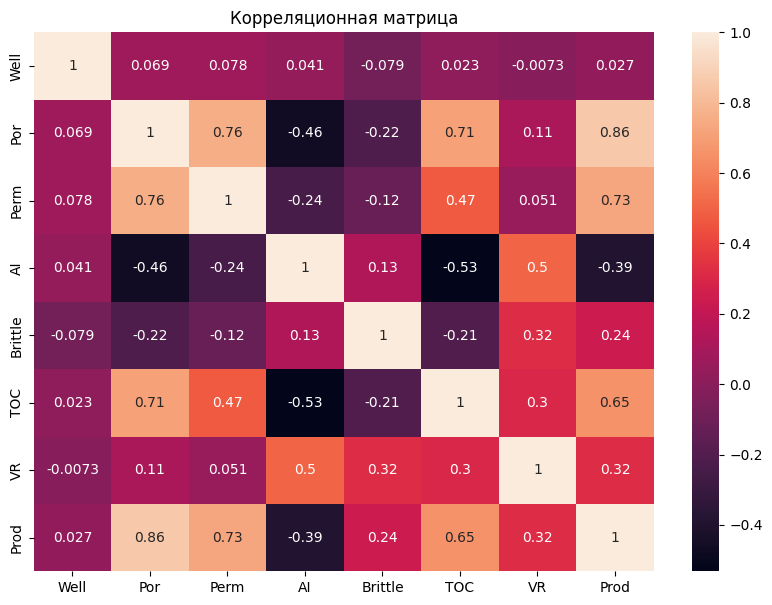

In [9]:
# Построить корреляционную матрицу
corr_matrix = data.corr()

# Построить тепловую карту полученной матрицы
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.title("Корреляционная матрица")

# Вычислить детерминант
det = np.linalg.det(corr_matrix)

# Вычислить ранг корреляционной матрицы
rank = np.linalg.matrix_rank(corr_matrix)

print(f"Детерминант корреляционной матрицы: {det};\nРанг корреляционной матрицы: {rank}")

<div class="alert alert-block">
<b>Выводы</b>

- Корреляционная матрица **плохо обусловлена**, т.к. ее детерминант стремится к нулю;
- Наиболее кореллирующие признаки с целевым (Prod) - **Por** (0.86), **Perm** (0.73) и **TOC** (0.65), что соответствует выводам разведывательного анализа;
- **Чистая коллинеарность отсутствует**; при этом наблюдаются высокие коэффициенты корреляции между признаками, наиболее коррелирующими с целевым, а также стремящееся к нулю значение детерминанта матрицы при ее максимальном ранге, что говорит о **наличии мультиколлинеарности**;
- При исключении лишних признаков из объема данных модель классической линейной регрессии будет применима.
</div>

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [10]:
# Создать матрицу наблюдений Х
X = np.column_stack((np.ones(data.shape[0]), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))

# Создать вектор правильных ответов y
y = data[['Prod']]

# Построить модель линейной регрессии по МНК
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y
w_hat.index = ['Intercept', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

# Вывести вектор полученных весов модели
print(w_hat.astype(int))

           Prod
Intercept -1232
Well          0
Por         230
Perm        116
AI         -365
Brittle      24
TOC         -78
VR          785


<div class="alert alert-block">
<b>Выводы</b>

- Признак **Well** линейно независим по отношению к целевому признаку, т.к. является идентификатором скважины;
- При увеличении **пористости** скважины на 1% объем ежедневной добычи газа **увеличится** на **230** млн. куб. фт;
- При увеличении **проницаемости** скважины на 1 ежедневная добыча **увеличится** на **116** млн. куб. фт;
- При увеличении **акустического импеданса** на 1 кг/кв.м * 10^6 ежедневная добыча **снизится** на **365** млн. куб. фт.
</div>

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [11]:
# Задать новые параметры и создать соответствующий им вектор
data_new = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
data_new = np.array([1, *data_new.values()])

# Прогнозируемая выработка новой скважины
prod_new_predict = (data_new @ w_hat).iloc[0]
print(f"Прогнозируемая выработка новой скважины: {prod_new_predict:.2f} млн. куб. фт")

# Реальная выработка новой скважины
prod_new_fact = 4748.315024
print(f"Фактическая выработка новой скважины: {prod_new_fact:.2f} млн. куб. фт")

# Определить величину абсолютной ошибки
err = abs(prod_new_fact - prod_new_predict)
print(f"Значение абсолютной ошибки: {err:.2f} млн. куб. фт ({round((err / prod_new_fact) * 100, 3)}%)")

# Осуществить прогноз (посредством скалярного произведения вектора признаков и коэффициентов регрессии)
y_predict = X @ w_hat

# Для оценки качества регрессионных моделей выберем следующие метрики:
# 1. MAE - средняя абсолютная ошибка
# 2. R² - коэффициент детерминации
mae = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)

# Вывести метрики на экран
print("\nМетрики качества модели:")
print(f"MAE: {mae:.2f} млн. куб. фт")
print(f"R²: {r2:.3f}%")

Прогнозируемая выработка новой скважины: 4723.06 млн. куб. фт
Фактическая выработка новой скважины: 4748.32 млн. куб. фт
Значение абсолютной ошибки: 25.25 млн. куб. фт (0.532%)

Метрики качества модели:
MAE: 153.62 млн. куб. фт
R²: 0.960%


<div class="alert alert-block">
<b>Выводы</b>

- Значение абсолютной ошибки для новой скважины невелико (**0.532%** от фактического объема выработки новой скважины);
- Значение метрики **MAE** означает, что модель в среднем ошибается на **153.62** млн. куб. фт (*приемлимое значение*);
- Значение метрики $R^2$ в **96%** указывает на высокую степень соответствия модели данным.
</div>

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [12]:
# Вывести корреляционную матрицу
print(f"Корреляционная матрица:\n{corr_matrix['Prod']}")

# Вывести вектор весов модели
print(f"\nВектор весов модели:\n{round(w_hat.astype(int))}")

# Получить данные по признаку с некорректной корреляцией (TOC)
print(f"\nХарактеристики признака TOC:\n{data['TOC'].describe()}")

Корреляционная матрица:
Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

Вектор весов модели:
           Prod
Intercept -1232
Well          0
Por         230
Perm        116
AI         -365
Brittle      24
TOC         -78
VR          785

Характеристики признака TOC:
count    200.000000
mean       0.990450
std        0.481588
min       -0.190000
25%        0.617500
50%        1.030000
75%        1.350000
max        2.180000
Name: TOC, dtype: float64


<div class="alert alert-block">
<b>Выводы</b>

- Признак **TOC** является одним из наиболее коррелируемых по отношению к целевому (**0.65**), однако ему соответствует **отрицательный коэффициент** вектора весов модели (**-78**);
- Признак **TOC** выражается в **процентах**, однако минимальным значением признака в первоначальном объеме данных является **отрицательное число**, что говорит о наличии **аномальных значений**.
</div>

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [13]:
# Произвести удаление из набора данных следующих признаков:
# 1. Well - является линейно независимым, характеризует идентификатор скважины и не требуется в модели
# 2. Perm - является одним из наиболее коррелируемых по отношению к целевому признаку, однако имеет достаточно
#           высокий коэффициент корреляции по отношению в Por (0.76), при этом по значению корреляции к Prod
#           уступает признаку Por
cleaned_data = data.drop(['Well', 'Perm'], axis=1)

# Создать обновленную матрицу наблюдений
X_cleaned = np.column_stack((np.ones(data.shape[0]), data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]))

# Создать обновленный вектор правильных ответов y
y_cleaned = cleaned_data[['Prod']]

# Построить модель линейной регрессии по МНК
w_hat_cleaned = np.linalg.inv(X_cleaned.T @ X_cleaned) @ X_cleaned.T @ y_cleaned
w_hat_cleaned.index = ['Intercept', 'Por', 'AI', 'Brittle', 'TOC', 'VR']

# Вывести вектор полученных весов модели
print(w_hat_cleaned.astype(int))

# Обновить прогноз
y_predict_cleaned = X_cleaned @ w_hat_cleaned

# Актуализировать метрики
mae_cleaned = mean_absolute_error(y_cleaned, y_predict_cleaned)
r2_cleaned = r2_score(y_cleaned, y_predict_cleaned)

# Вывести метрики на экран
print("\nМетрики качества модели:")
print(f"MAE: {mae_cleaned:.2f} млн. куб. фт")
print(f"R²: {r2_cleaned:.3f}%")

           Prod
Intercept -1889
Por         290
AI         -140
Brittle      28
TOC          89
VR          406

Метрики качества модели:
MAE: 170.37 млн. куб. фт
R²: 0.945%


<div class="alert alert-block">
<b>Выводы</b>

- При увеличении **пористости** на 1% ежесуточная добыча газа теперь **увеличивается** на **290** млн. куб. фт (ранее - на **230**);
- При увеличении **содержания органического углерода** на 1% добыча **увеличивается** на **89** млн. куб. фт (ранее - снижалась на **78**, коэффициент стал положительным);
- При увеличении **акустического импеданса** на 1 кг/кв.м * 10^6 добыча **снижается** на **140** млн. куб. фт (ранее - снижалась на **365**);
- Значения ранее выбранных метрик оценки модели **MAE** и $R^2$ **изменились незначительно**, однако в совокупности с упрощением модели посредством удаления из нее лишних признаков характеризует предпочтительность новой модели в использовании.
</div>

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [14]:
# Создать модель линейной регрессии
regression_model = LinearRegression()

# Обучить модель на отсортированных данных
regression_model.fit(X_cleaned, y_cleaned)

# Сделать прогноз для всего обучающего набора данных
y_predict_sklearn = regression_model.predict(X_cleaned)

# Получить коэффициенты
sklearn_intercept = regression_model.intercept_[0]
sklearn_weights = regression_model.coef_[0]
w_hat_sklearn = pd.DataFrame({'Prod': sklearn_weights}, index=['Intercept', 'Por', 'AI', 'Brittle', 'TOC', 'VR'])
w_hat_sklearn.iloc[0] = sklearn_intercept

# Вычислить метрики
mae_sklearn = mean_absolute_error(y_cleaned, y_predict_sklearn)
r2_sklearn = r2_score(y_cleaned, y_predict_sklearn)

# Вывести метрики на экран
print("Метрики качества модели:")
print(f"MAE: {mae_sklearn:.2f} млн. куб. фт")
print(f"R²: {r2_sklearn:.3f}%")

# Вывести сравнение параметров обеих моделей (полученных вручную и через sklearn)
print("\nКоэффициенты, рассчитанные вручную:")
print(w_hat_cleaned.astype(int))
print("\nКоэффициенты, полученные через sklearn:")
print(w_hat_sklearn.astype(int))

Метрики качества модели:
MAE: 170.37 млн. куб. фт
R²: 0.945%

Коэффициенты, рассчитанные вручную:
           Prod
Intercept -1889
Por         290
AI         -140
Brittle      28
TOC          89
VR          406

Коэффициенты, полученные через sklearn:
           Prod
Intercept -1889
Por         290
AI         -140
Brittle      28
TOC          89
VR          406


<div class="alert alert-block">
<b>Вывод</b>

- Вручную полученные коэффициенты и значения метрик (с помощью МНК) полностью соответствует высчитанным в sklearn, что говорит о равносильности использования обоих методов для создания регрессионных моделей.
</div>

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [69]:
# Выбрать необходимые признаки
X = data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]
y = data['Prod']

# Произвести стандартизацию
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Добавить полиноминальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Вывести число полученных факторов
print(f"Количество сформированных факторов: {X_poly.shape[1]}\n")

# Создать модель линейной регрессии (с интерцептом)
lr = LinearRegression(fit_intercept=True)

# Осуществить кросс-валидацию по ранее выбранными (в задании 5.3) метрикам:
# 1. MAE - средняя абсолютная ошибка
# 2. R² - коэффициент детерминации

# При отсутствии полиноминальных признаков
cv_results_mae_non_poly = cross_validate(lr, X_cleaned, y_cleaned, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_r2_non_poly = cross_validate(lr, X_cleaned, y_cleaned, scoring='r2', cv=5, return_train_score=True)

# При наличии полиноминальных признаков
cv_results_mae = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_r2 = cross_validate(lr, X_poly, y, scoring='r2', cv=5, return_train_score=True)

# Вывести результаты кросс-валидации
print("Значения метрик без полиноминальных признаков в модели")
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_non_poly['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_non_poly['test_score'].mean()))
print('R² на тренировочных фолдах: {:.3f}'.format(cv_results_r2_non_poly['train_score'].mean()))
print('R² на валидационных фолдах: {:.3f}'.format(cv_results_r2_non_poly['test_score'].mean()))

print("\nЗначения метрик с наличием полиноминальных признаков в модели")
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae['test_score'].mean()))
print('R² на тренировочных фолдах: {:.3f}'.format(cv_results_r2['train_score'].mean()))
print('R² на валидационных фолдах: {:.3f}'.format(cv_results_r2['test_score'].mean()))

Количество сформированных факторов: 55

Значения метрик без полиноминальных признаков в модели
MAE на тренировочных фолдах: 169.63
MAE на валидационных фолдах: 179.87
R² на тренировочных фолдах: 0.946
R² на валидационных фолдах: 0.937

Значения метрик с наличием полиноминальных признаков в модели
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
R² на тренировочных фолдах: 0.993
R² на валидационных фолдах: 0.974


<div class="alert alert-block">
<b>Выводы</b>

- Полученные значения метрики **MAE** значительно ниже значений для моделей, в которых не используются полиноминальные признаки, однако разница между показателями для обучающей и тестовой выборок практически в 2 раза указывает на наличие переобучения (*что характерно, т.к. N = 200*);
- Значения метрики $R^2$ превышают значения для моделей, в которых не используются полиноминальные признаки, указывая на более высокую степень соответствия модели данным;
- Увеличенное по сравнению с классической линейной регрессией количество факторов способствует улучшению значений метрик.
</div>

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [77]:
# Создать список потенциальных значений alpha
alpha_values = {'alpha': [0.01, 0.1, 1, 2, 3, 4, 5, 10, 20, 50, 100]}

# Найти приемлимый alpha с помощью GridSearchCV
grid_search_l1 = GridSearchCV(Lasso(max_iter=10000),
                           param_grid=alpha_values,
                           scoring=['neg_mean_absolute_error', 'r2'],
                           refit='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_lasso = grid_search_l1.fit(X_poly, y).best_params_
alpha_l1 = best_params_lasso['alpha']
print(f"Лучшее полученное значение alpha: {alpha_l1}\n")

# Создать модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=alpha_l1, fit_intercept=True, max_iter=10000)

# Осуществить кросс-валидацию
cv_results_mae_lasso = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_r2_lasso = cross_validate(lasso, X_poly, y, scoring='r2', cv=5, return_train_score=True)

# Вывести результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_lasso['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_lasso['test_score'].mean()))
print('R² на тренировочных фолдах: {:.3f}'.format(cv_results_r2_lasso['train_score'].mean()))
print('R² на валидационных фолдах: {:.3f}'.format(cv_results_r2_lasso['test_score'].mean()))

# Дополнительно определить количество ненулевых коэффициентов модели
coef_lasso = np.sum(lasso.fit(X_poly, y).coef_ != 0)
print(f"\nКоличество ненулевых коэффициентов: {coef_lasso} из {X_poly.shape[1]}")

Лучшее полученное значение alpha: 4

MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.98
R² на тренировочных фолдах: 0.990
R² на валидационных фолдах: 0.985

Количество ненулевых коэффициентов: 25 из 55


<div class="alert alert-block">
<b>Выводы</b>

- Полученные значения метрики **MAE** ниже значений для полиноминальной регрессии, также снизилась разница между показателями для обучающей и тестовой выборок;
- Значение метрики $R^2$ для обучающей выборки снизилось незначительно, однако образовался прирост для тестовой выборки (*по сравнению с показателями полиноминальной регрессии*);
- По результатам $L_1$-регуляризации в модели используется **25** ненулевых коэффициентов из **55**.
</div>

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [76]:
# Найти приемлимый alpha с помощью GridSearchCV
grid_search_l2 = GridSearchCV(Ridge(max_iter=10000),
                           param_grid=alpha_values,
                           scoring=['neg_mean_absolute_error', 'r2'],
                           refit='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_ridge = grid_search_l2.fit(X_poly, y).best_params_
alpha_l2 = best_params_ridge['alpha']
print(f"Лучшее полученное значение alpha: {alpha_l2}\n")

# Создать модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=alpha_l2, fit_intercept=True, max_iter=10000)

# Осуществить кросс-валидацию
cv_results_mae_ridge = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_r2_ridge = cross_validate(ridge, X_poly, y, scoring='r2', cv=5, return_train_score=True)

# Вывести результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_ridge['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_ridge['test_score'].mean()))
print('R² на тренировочных фолдах: {:.3f}'.format(cv_results_r2_ridge['train_score'].mean()))
print('R² на валидационных фолдах: {:.3f}'.format(cv_results_r2_ridge['test_score'].mean()))

# Дополнительно определить количество коэффициентов модели, значение которых ниже 0.01
coef_ridge = np.sum(abs(ridge.fit(X_poly, y).coef_) < 0.01)
print(f"\nКоличество коэффициентов, близких к нулю (< 0.01): {coef_ridge} из {X_poly.shape[1]}")

Лучшее полученное значение alpha: 1

MAE на тренировочных фолдах: 65.19
MAE на валидационных фолдах: 105.37
R² на тренировочных фолдах: 0.992
R² на валидационных фолдах: 0.980

Количество коэффициентов, близких к нулю (< 0.01): 0 из 55


<div class="alert alert-block">
<b>Выводы</b>

- Значение метрики **MAE** для обучающей выборки (**65.19**) ниже в случае $L_2$-регулиризации, чем для $L_1$ (**71.32**);
- Значение метрики **MAE** для тестовой выборки (**105.37**) выше в случае $L_2$-регулиризации, чем для $L_1$ (**88.98**);
- Значения метрики $R^2$ для обеих выборок в случае $L_2$-регуляризации остались примерно на том же уровне, что и $L_1$;
- По результатам $L_2$-регуляризации в модели отсутствуют коэффициенты, значения которых близки к нулю;
- В пропорциональном соотношении значений метрик использование $L_1$-регуляризации предпочтительнее, чем $L_2$.
</div>

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [81]:
# Создать список потенциальных значений alpha
en_params = {'alpha': [0.1, 1, 2, 3, 4, 5, 10],
             'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# Найти приемлимые alpha и l1_ratio с помощью GridSearchCV
grid_search_en = GridSearchCV(ElasticNet(max_iter=10000),
                           param_grid=en_params,
                           scoring=['neg_mean_absolute_error', 'r2'],
                           refit='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

# Обозначить лучшие гиперпараметры
best_params_en = grid_search_en.fit(X_poly, y).best_params_
alpha = best_params_en['alpha']
l1_ratio = best_params_en['l1_ratio']
print(f"Лучшее полученное значение alpha: {alpha}")
print(f"Лучшее полученное значение l1_ratio: {l1_ratio}\n")

# Создать модель линейной регрессии c ElasticNet
elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True, max_iter=10000)

# Осуществить кросс-валидацию
cv_results_mae_en = cross_validate(elasticnet, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_r2_en = cross_validate(elasticnet, X_poly, y, scoring='r2', cv=5, return_train_score=True)

# Вывести результаты кросс-валидации
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results_mae_en['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results_mae_en['test_score'].mean()))
print('R² на тренировочных фолдах: {:.3f}'.format(cv_results_r2_en['train_score'].mean()))
print('R² на валидационных фолдах: {:.3f}'.format(cv_results_r2_en['test_score'].mean()))

# Дополнительно определить количество ненулевых коэффициентов модели
coef_en = np.sum(elasticnet.fit(X_poly, y).coef_ != 0)
print(f"\nКоличество ненулевых коэффициентов: {coef_en} из {X_poly.shape[1]}")

Лучшее полученное значение alpha: 0.1
Лучшее полученное значение l1_ratio: 0.9

MAE на тренировочных фолдах: 68.26
MAE на валидационных фолдах: 105.99
R² на тренировочных фолдах: 0.991
R² на валидационных фолдах: 0.980

Количество ненулевых коэффициентов: 53 из 55


<div class="alert alert-block">
<b>Выводы</b>

- Значение метрики **MAE** для обеих выборок схожи со значениями, полученными при реализации $L_2$-регулиризации;
- Значения метрики $R^2$ для обеих выборок практически не отличаются от значений при $L_2$-регуляризации;
- По результатам совмещения $L_1$ и $L_2$-регуляризаций в модели отсутствуют нулевые коэффициенты.
</div>

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [80]:
# Консолидировать все ранее полученные результаты
result = {
    'Наименование модели': ['Linear', 'Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, np.nan, best_params_lasso, best_params_ridge, best_params_en],
    'Is_poly': [False, True, True, True, True],
    'MAE_train': [-cv_results_mae_non_poly['train_score'].mean(), -cv_results_mae['train_score'].mean(), -cv_results_mae_lasso['train_score'].mean(), -cv_results_mae_ridge['train_score'].mean(), -cv_results_mae_en['train_score'].mean()],
    'MAE_test': [-cv_results_mae_non_poly['test_score'].mean(), -cv_results_mae['test_score'].mean(), -cv_results_mae_lasso['test_score'].mean(), -cv_results_mae_ridge['test_score'].mean(), -cv_results_mae_en['test_score'].mean()],
    'R2_train': [cv_results_r2_non_poly['train_score'].mean(), cv_results_r2['train_score'].mean(), cv_results_r2_lasso['train_score'].mean(), cv_results_r2_ridge['train_score'].mean(), cv_results_r2_en['train_score'].mean()],
    'R2_test': [cv_results_r2_non_poly['test_score'].mean(), cv_results_r2['test_score'].mean(), cv_results_r2_lasso['test_score'].mean(), cv_results_r2_ridge['test_score'].mean(), cv_results_r2_en['test_score'].mean()],
    'Кол-во ненулевых признаков': [X_cleaned.shape[1], X_poly.shape[1], coef_lasso, (X_poly.shape[1] - coef_ridge), coef_en],
    'Кол-во признаков': [X_cleaned.shape[1], X_poly.shape[1], X_poly.shape[1], X_poly.shape[1], X_poly.shape[1]],
}

# Создать DataFrame с результатами
result_df = pd.DataFrame(result)
display(result_df)

,Наименование модели,Гиперпараметры,Is_poly,MAE_train,MAE_test,R2_train,R2_test,Кол-во ненулевых признаков,Кол-во признаков
0,Linear,NaN,False,169.631878,179.871065,0.946001,0.937286,6,6
1,Polynomial,NaN,True,61.913339,116.969121,0.993045,0.974413,55,55
2,Lasso,{'alpha': 4},True,71.316109,88.976787,0.990444,0.984749,25,55
3,Ridge,{'alpha': 1},True,65.192889,105.371899,0.992187,0.980046,55,55
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,68.260685,105.988061,0.991471,0.979979,53,55


<div class="alert alert-block">
<b>Итоги</b>

1. В настоящей работе были созданы следующие регрессионные модели:
- Модель линейной регрессии без полиноминальных признаков (*Linear*);
- Модель линейной регрессии с полиноминальными признаками (*Polynomial*);
- Модель с $L_1$-регуляризацией (*Lasso*);
- Модель с $L_2$-регуляризацией (*Ridge*);
- Модель с $L_1$ и $L_2$-регуляризацией (*ElasticNet*).

2. Анализируя выбранные в работе метрики MAE и $R^2$, можно сделать следующие выводы:
- Модель **Linear** показала самые низкие результаты по всем метрикам;
- Все модели с полиноминальными признаками имеют лучшие результаты по MAE и R², чем **Linear**;
- Модель **Polynomial** имеет лучший результат на обучающей выборке по MAE, однако ее разница между обучающей и тестовой выборками - самая большая среди моделей с полиноминальными признаками;
- Модель **Lasso** показала самые оптимальные результаты как по обеим выборкам, так и по обеим метрикам, но $L_1$-регуляризация зануляет 30 из 55 признаков;
- Модели **Ridge** и **ElasticNet** имеют схожие результаты по обеим выборкам и метрикам.

3. Самой оптимальной и качественной моделью принимается модель **Lasso**, демонстрируя самые низкие показатели переобученности модели и высокий уровень прогнозирования.
</div>